In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # Library interaktif untuk Peta Dunia
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Cek dan install kneed untuk Elbow Method otomatis
try:
    from kneed import KneeLocator
except ImportError:
    print("Library 'kneed' belum terinstall. Sedang menginstall...")
    !pip install kneed
    from kneed import KneeLocator

print("Semua library berhasil di-import!")

Library 'kneed' belum terinstall. Sedang menginstall...
Semua library berhasil di-import!


In [2]:
# Load Dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)

# Menampilkan 5 baris pertama
print("5 Data Teratas:")
display(df.head())

5 Data Teratas:


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [3]:
# Membersihkan nama kolom (menghapus spasi dan karakter khusus)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_').str.replace('-', '_')

# Menampilkan informasi dataset yang sudah dibersihkan kolomnya
print("Info Dataset & Tipe Data:")
df.info()

# Cek Missing Values
print("\nJumlah Missing Values:")
print(df.isnull().sum())

Info Dataset & Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other_names              224 non-null    object 
 2   ISO_3166_1_alpha_3_CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total_Cases              225 non-null    int64  
 6   Total_Deaths             225 non-null    int64  
 7   Tot Cases__1M_pop        225 non-null    int64  
 8   Tot Deaths_1M_pop        225 non-null    int64  
 9   Death_percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB

Jumlah Missing Values:
Country                    0
Other_names                1
ISO_3166_1_alpha_3_CODE    0
Population                 0
Continent         

Menampilkan Visualisasi 1: Peta Dunia berdasarkan Benua...



[Penjelasan Visualisasi 1]:
Visualisasi ini memetakan setiap negara ke dalam benua masing-masing.
Tujuannya adalah memvalidasi cakupan geografis data dan melihat sebaran negara yang akan dianalisis.

Menampilkan Visualisasi 2: Total Kasus per Benua...


/tmp/ipython-input-3725389307.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




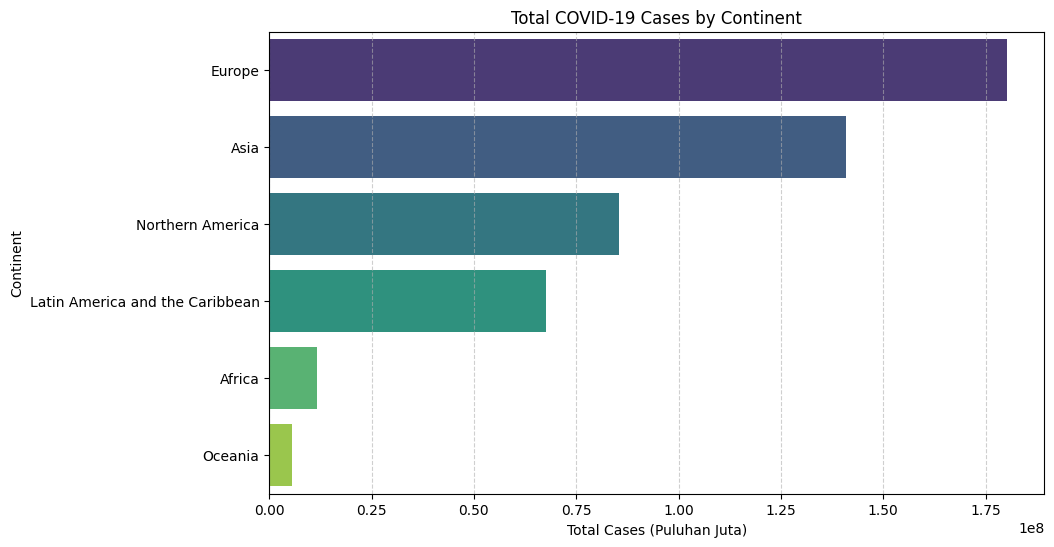


[Penjelasan Visualisasi 2]:
Grafik batang ini menunjukkan akumulasi total kasus COVID-19 di setiap benua.
Ini membantu kita memahami wilayah mana yang paling terdampak secara absolut sebelum melihat detail per negara.


In [14]:
# ==========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualisasi 1: World Map by Continent (Sesuai Gambar Tugas) ---
# Peta ini memvisualisasikan sebaran negara berdasarkan benua.
print("Menampilkan Visualisasi 1: Peta Dunia berdasarkan Benua...")

fig_map = px.choropleth(
    df,
    locations="ISO_3166_1_alpha_3_CODE", # Kode negara ISO 3 huruf
    color="Continent",                   # Warna berbeda tiap benua
    hover_name="Country",                # Muncul nama negara saat kursor diarahkan
    title="World Map of Countries by Continent",
    projection="natural earth",          # Proyeksi peta standar
    color_discrete_sequence=px.colors.qualitative.Set1 # Pilihan warna yang jelas
)

# Menampilkan peta
fig_map.show()

print("\n[Penjelasan Visualisasi 1]:")
print("Visualisasi ini memetakan setiap negara ke dalam benua masing-masing.")
print("Tujuannya adalah memvalidasi cakupan geografis data dan melihat sebaran negara yang akan dianalisis.")


# --- Visualisasi 2: Total Cases per Continent (Bar Plot) ---
# Visualisasi tambahan untuk memenuhi syarat "At least 2 meaningful visualizations"
# Kita melihat benua mana yang memiliki total kasus terbanyak.
print("\nMenampilkan Visualisasi 2: Total Kasus per Benua...")

# Grouping data berdasarkan benua
continent_cases = df.groupby('Continent')['Total_Cases'].sum().reset_index().sort_values(by='Total_Cases', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Cases', y='Continent', data=continent_cases, palette='viridis')
plt.title('Total COVID-19 Cases by Continent')
plt.xlabel('Total Cases (Puluhan Juta)')
plt.ylabel('Continent')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

print("\n[Penjelasan Visualisasi 2]:")
print("Grafik batang ini menunjukkan akumulasi total kasus COVID-19 di setiap benua.")
print("Ini membantu kita memahami wilayah mana yang paling terdampak secara absolut sebelum melihat detail per negara.")

In [4]:
# ==========================================
# HANDLING MISSING VALUES
# ==========================================
# Mengisi nilai yang hilang di kolom 'Other_names' dengan string 'Unknown'
# Kita tidak men-drop barisnya karena data numerik negara tersebut masih lengkap dan berharga
df['Other_names'] = df['Other_names'].fillna('Unknown')

# Verifikasi ulang untuk memastikan tidak ada lagi missing values
print("Status Missing Values setelah handling:")
print(df.isnull().sum())

Status Missing Values setelah handling:
Country                    0
Other_names                0
ISO_3166_1_alpha_3_CODE    0
Population                 0
Continent                  0
Total_Cases                0
Total_Deaths               0
Tot Cases__1M_pop          0
Tot Deaths_1M_pop          0
Death_percentage           0
dtype: int64


In [5]:
# ==========================================
# ENCODING & TRANSFORMATION
# ==========================================
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Encoding Data Kategorikal (Continent)
# Mengubah nama benua menjadi angka (0, 1, 2, dst)
le = LabelEncoder()
df['Continent_Encoded'] = le.fit_transform(df['Continent'])

# Menampilkan hasil encoding
print("Contoh hasil Encoding Benua:")
display(df[['Country', 'Continent', 'Continent_Encoded']].head())

# 2. Feature Selection
# Memilih kolom numerik yang akan digunakan untuk perhitungan jarak antar cluster
# Kita membuang kolom nama negara dan kode ISO karena tidak relevan untuk perhitungan matematis
features = [
    'Population',
    'Total_Cases',
    'Total_Deaths',
    'Tot_Cases__1M_pop',  # Perhatikan double underscore jika ada perubahan nama otomatis sebelumnya
    'Tot_Deaths_1M_pop',
    'Death_percentage'
]

# Pastikan nama kolom sesuai dengan hasil preprocessing di Cell 3 (kadang spasi jadi _)
# Kita gunakan list comprehension untuk memastikan kita mengambil kolom yang benar yang ada di df
valid_features = [col for col in features if col in df.columns]

print(f"\nFitur yang digunakan untuk Clustering: {valid_features}")

# 3. Data Scaling (StandardScaler)
sc = StandardScaler()

# Kita buat DataFrame baru khusus untuk hasil scaling agar data asli tidak tertimpa
df_scaled = pd.DataFrame(sc.fit_transform(df[valid_features]), columns=valid_features)

# Menampilkan hasil scaling
print("\nData setelah Scaling (df_scaled):")
display(df_scaled.head())

# Menampilkan statistik data yang sudah di-scale (Mean harus mendekati 0, Std mendekati 1)
print("\nStatistik Data Scaled:")
display(df_scaled.describe())

Contoh hasil Encoding Benua:


,Country,Continent,Continent_Encoded
0,Afghanistan,Asia,1
1,Albania,Europe,2
2,Algeria,Africa,0
3,Andorra,Europe,2
4,Angola,Africa,0



Fitur yang digunakan untuk Clustering: ['Population', 'Total_Cases', 'Total_Deaths', 'Death_percentage']

Data setelah Scaling (df_scaled):


,Population,Total_Cases,Total_Deaths,Death_percentage
0,0.038789,-0.276449,-0.204571,1.651243
1,-0.231774,-0.263220,-0.247798,-0.097285
2,0.073154,-0.264347,-0.212815,0.657760
3,-0.251891,-0.295431,-0.282336,-0.611015
4,-0.003016,-0.287281,-0.264265,0.271204



Statistik Data Scaled:


,Population,Total_Cases,Total_Deaths,Death_percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,-1.578984e-17,2.713879e-17,8.881784e-18,2.131628e-16
std,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00
min,-2.524428e-01,-3.009443e-01,-2.839181e-01,-8.309821e-01
25%,-2.483707e-01,-2.976287e-01,-2.819631e-01,-5.367737e-01
50%,-2.105007e-01,-2.783629e-01,-2.635925e-01,-2.343236e-01
75%,-9.477552e-02,-1.504507e-01,-1.426217e-01,3.066382e-01
max,1.010746e+01,1.097204e+01,1.014493e+01,9.613966e+00


Sedang mencari K terbaik...
Best K (Elbow Point) ditemukan pada: K = 4


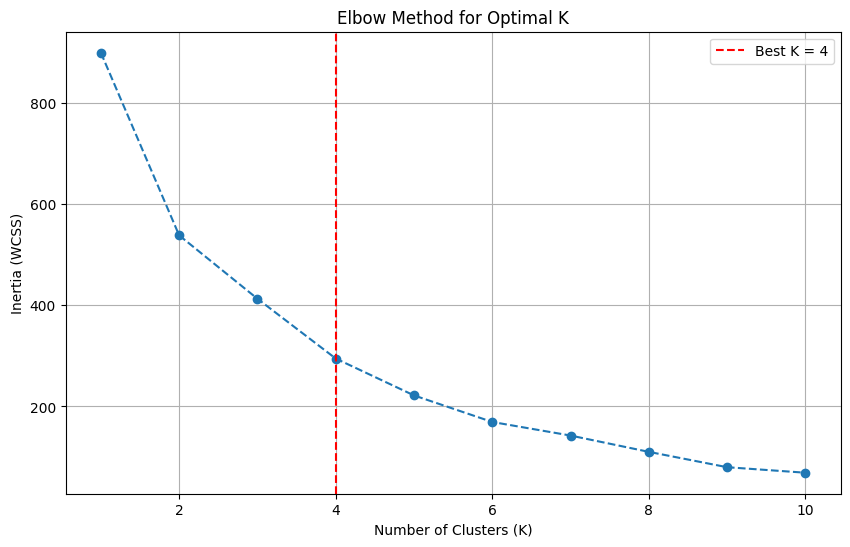

In [6]:
# ==========================================
# KMEANS: ELBOW METHOD
# ==========================================
from sklearn.cluster import KMeans

# 1. Menghitung Inertia untuk range K (1-10)
inertia = []
range_k = range(1, 11)

print("Sedang mencari K terbaik...")
for k in range_k:
    # Menggunakan random_state=42 agar hasil konsisten (reproducible)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# 2. Menemukan titik Elbow secara otomatis menggunakan KneeLocator
kl = KneeLocator(range_k, inertia, curve="convex", direction="decreasing")
best_k = kl.elbow

print(f"Best K (Elbow Point) ditemukan pada: K = {best_k}")

# 3. Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.legend()
plt.grid(True)
plt.show()

Melatih KMeans dengan K=4...


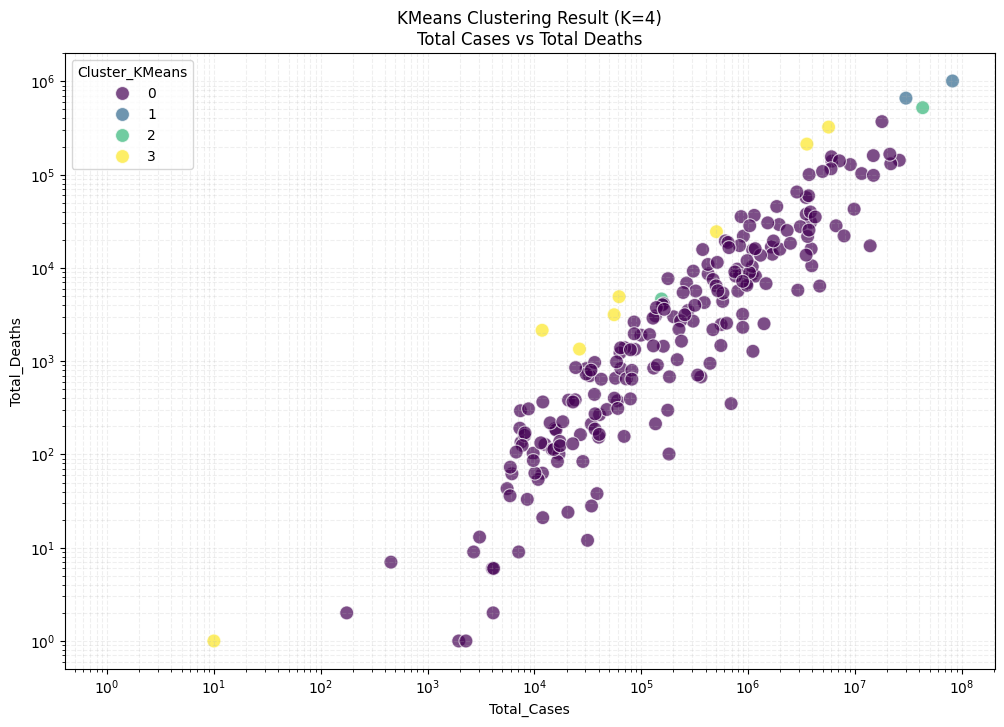


Contoh Negara per Cluster:
Cluster 0: Afghanistan, Albania, Algeria, Andorra, Angola
Cluster 1: Brazil, USA
Cluster 2: China, India
Cluster 3: Egypt, Mexico, Peru, Somalia, Sudan


In [7]:
# ==========================================
# KMEANS MODELING & VISUALIZATION
# ==========================================
# 1. Fit Model dengan Best K
print(f"Melatih KMeans dengan K={best_k}...")
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters_kmeans = kmeans_final.fit_predict(df_scaled)

# 2. Menyimpan label cluster ke DataFrame Asli
df['Cluster_KMeans'] = clusters_kmeans

# 3. Visualisasi Scatter Plot (Contoh: Total Cases vs Deaths)
# Kita gunakan data asli (bukan scaled) untuk plot agar angkanya real
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Total_Cases',
    y='Total_Deaths',
    hue='Cluster_KMeans',
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title(f'KMeans Clustering Result (K={best_k})\nTotal Cases vs Total Deaths')
plt.xscale('log') # Menggunakan skala log karena perbedaan angka antar negara sangat besar
plt.yscale('log')
plt.grid(True, which="both", ls="--", alpha=0.2)
plt.show()

# Menampilkan contoh negara di setiap cluster
print("\nContoh Negara per Cluster:")
for c in range(best_k):
    countries = df[df['Cluster_KMeans'] == c]['Country'].head(5).values
    print(f"Cluster {c}: {', '.join(countries)}")

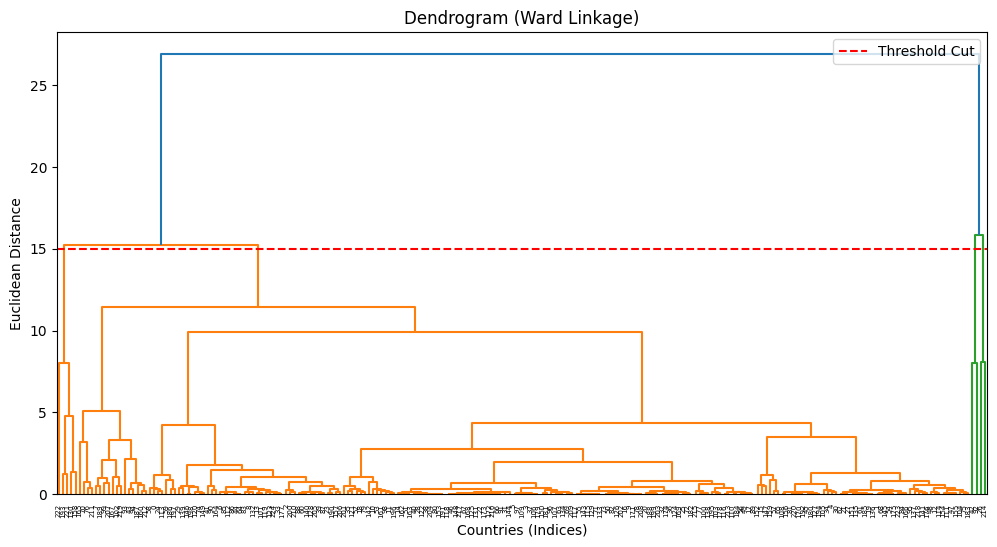

Note: Garis horizontal merah membantu kita memperkirakan jumlah cluster optimal.
Jumlah garis vertikal yang dipotong oleh garis merah adalah jumlah cluster yang disarankan.


In [8]:
# ==========================================
# HIERARCHICAL CLUSTERING: DENDROGRAM
# ==========================================
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
plt.title("Dendrogram (Ward Linkage)")

# Menggunakan method 'ward' untuk meminimalkan varians dalam cluster
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

plt.xlabel("Countries (Indices)")
plt.ylabel("Euclidean Distance")
plt.axhline(y=15, color='r', linestyle='--', label="Threshold Cut") # Garis potong imajiner
plt.legend()
plt.show()

print("Note: Garis horizontal merah membantu kita memperkirakan jumlah cluster optimal.")
print("Jumlah garis vertikal yang dipotong oleh garis merah adalah jumlah cluster yang disarankan.")

In [9]:
# ==========================================
# HYPERPARAMETER TUNING FOR HAC
# ==========================================
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Setting parameter yang akan diuji
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']
range_n_clusters = range(2, 6) # Kita batasi 2-5 agar interpretasi kebijakan tidak terlalu rumit

best_score = -1
best_params = {}

print("Mencari model HAC terbaik...")

for n in range_n_clusters:
    for link in linkage_methods:
        for met in metrics:
            # Ward hanya support euclidean
            if link == 'ward' and met != 'euclidean':
                continue

            try:
                hc = AgglomerativeClustering(n_clusters=n, linkage=link, metric=met)
                labels = hc.fit_predict(df_scaled)
                score = silhouette_score(df_scaled, labels)

                # Simpan score terbaik
                if score > best_score:
                    best_score = score
                    best_params = {'n_clusters': n, 'linkage': link, 'metric': met}
            except Exception as e:
                continue

print(f"\nBest HAC Parameters ditemukan: {best_params}")
print(f"Best Silhouette Score HAC: {best_score:.4f}")

# ==========================================
# BUILD FINAL HAC MODEL
# ==========================================
# Membuat model berdasarkan parameter terbaik di atas
hc_final = AgglomerativeClustering(
    n_clusters=best_params['n_clusters'],
    linkage=best_params['linkage'],
    metric=best_params['metric']
)

# Simpan hasil cluster ke DataFrame
df['Cluster_HC'] = hc_final.fit_predict(df_scaled)

print("Label Cluster HAC berhasil disimpan ke kolom 'Cluster_HC'.")

Mencari model HAC terbaik...

Best HAC Parameters ditemukan: {'n_clusters': 2, 'linkage': 'average', 'metric': 'euclidean'}
Best Silhouette Score HAC: 0.8973
Label Cluster HAC berhasil disimpan ke kolom 'Cluster_HC'.


In [10]:
# ==========================================
# MODEL EVALUATION & COMPARISON
# ==========================================
# Hitung Silhouette Score untuk KMeans (Model sebelumnya)
score_kmeans = silhouette_score(df_scaled, df['Cluster_KMeans'])

# Score HAC sudah didapat di cell sebelumnya
score_hc = best_score

print("===== PERBANDINGAN MODEL =====")
print(f"1. KMeans Silhouette Score : {score_kmeans:.4f}")
print(f"2. HAC Silhouette Score    : {score_hc:.4f}")

# Menentukan Pemenang
if score_kmeans > score_hc:
    best_model_name = "KMeans"
    df['Final_Cluster'] = df['Cluster_KMeans']
else:
    best_model_name = "Hierarchical Clustering"
    df['Final_Cluster'] = df['Cluster_HC']

print(f"\nKESIMPULAN: Model terbaik adalah **{best_model_name}**.")
print("Kita akan menggunakan hasil dari model ini untuk profil dan rekomendasi kebijakan.")

===== PERBANDINGAN MODEL =====
1. KMeans Silhouette Score : 0.7337
2. HAC Silhouette Score    : 0.8973

KESIMPULAN: Model terbaik adalah **Hierarchical Clustering**.
Kita akan menggunakan hasil dari model ini untuk profil dan rekomendasi kebijakan.


Kolom terdeteksi: 'Tot Cases__1M_pop' dan 'Tot Deaths_1M_pop'

Rata-rata Statistik per Cluster:


,Final_Cluster,Total_Cases,Total_Deaths,Tot Cases__1M_pop,Tot Deaths_1M_pop,Death_percentage
0,0,1.829182e+06,2.306967e+04,136418.973214,1088.151786,1.445072
1,1,8.183905e+07,1.008222e+06,244734.000000,3015.000000,1.231957


/tmp/ipython-input-1490002897.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final_Cluster', y='Death_percentage', data=cluster_summary, palette='magma')
/tmp/ipython-input-1490002897.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final_Cluster', y=col_cases_1m, data=cluster_summary, palette='viridis')


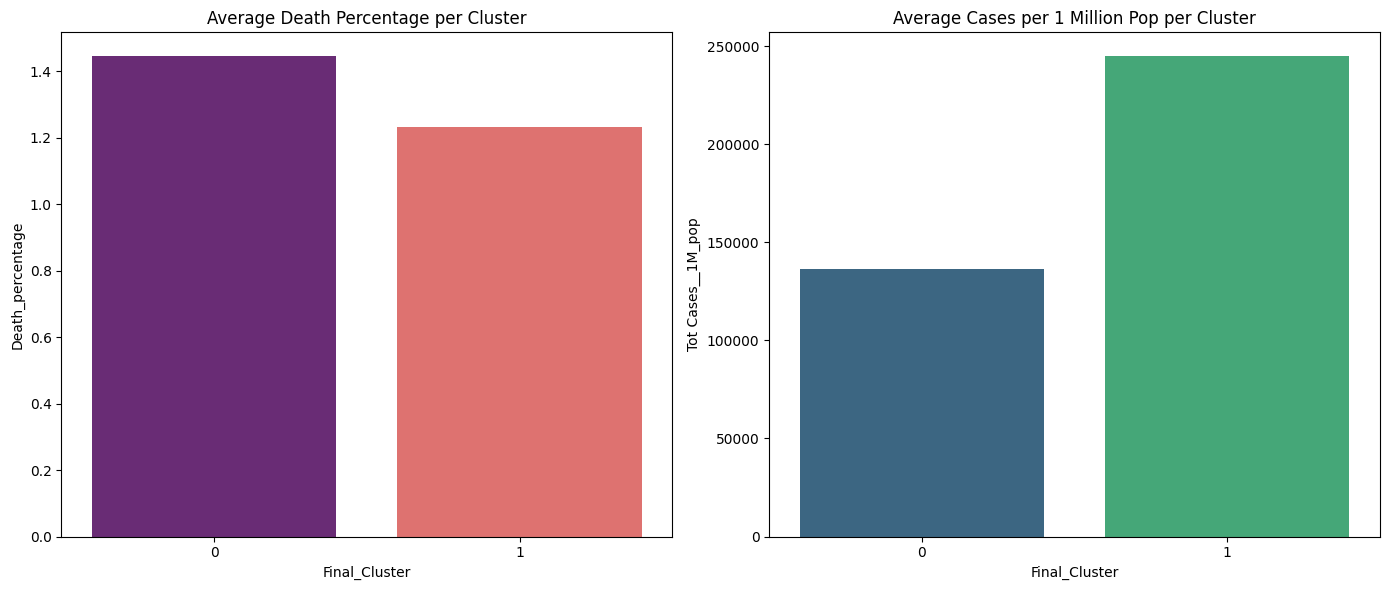


===== REKOMENDASI KEBIJAKAN PEMERINTAH (UN TASK FORCE) =====

[Cluster 0]:
Karakteristik: Death Rate 1.45%, Spread (per 1M): 136419
RECOMMENDATION: **VACCINATION PUSH**.
- Penyebaran luas tapi kematian rendah. Fokus percepatan vaksinasi dan booster.

[Cluster 1]:
Karakteristik: Death Rate 1.23%, Spread (per 1M): 244734
RECOMMENDATION: **VACCINATION PUSH**.
- Penyebaran luas tapi kematian rendah. Fokus percepatan vaksinasi dan booster.


In [12]:
# ==========================================
# CLUSTER PROFILING & INSIGHTS
# ==========================================

# 1. Deteksi Nama Kolom yang Benar secara Otomatis
# Mencari kolom yang mengandung "Cases" & "1M" dan "Deaths" & "1M"
col_cases_1m = [c for c in df.columns if 'Cases' in c and '1M' in c][0]
col_deaths_1m = [c for c in df.columns if 'Deaths' in c and '1M' in c][0]

print(f"Kolom terdeteksi: '{col_cases_1m}' dan '{col_deaths_1m}'")

# 2. Grouping Data (Profiling)
cluster_summary = df.groupby('Final_Cluster')[
    ['Total_Cases', 'Total_Deaths', col_cases_1m, col_deaths_1m, 'Death_percentage']
].mean().reset_index()

print("\nRata-rata Statistik per Cluster:")
display(cluster_summary)

# 3. Visualisasi Profiling
plt.figure(figsize=(14, 6))

# Plot 1: Death Percentage
plt.subplot(1, 2, 1)
sns.barplot(x='Final_Cluster', y='Death_percentage', data=cluster_summary, palette='magma')
plt.title('Average Death Percentage per Cluster')

# Plot 2: Cases per 1M Pop (Menggunakan nama kolom yang terdeteksi)
plt.subplot(1, 2, 2)
sns.barplot(x='Final_Cluster', y=col_cases_1m, data=cluster_summary, palette='viridis')
plt.title('Average Cases per 1 Million Pop per Cluster')

plt.tight_layout()
plt.show()

# 4. Government Policy Recommendations
print("\n===== REKOMENDASI KEBIJAKAN PEMERINTAH (UN TASK FORCE) =====")

for i, row in cluster_summary.iterrows():
    cluster_id = int(row['Final_Cluster'])
    death_rate = row['Death_percentage']
    cases_per_1m = row[col_cases_1m]  # Menggunakan variabel kolom dinamis

    print(f"\n[Cluster {cluster_id}]:")
    print(f"Karakteristik: Death Rate {death_rate:.2f}%, Spread (per 1M): {cases_per_1m:.0f}")

    # Logika Rekomendasi
    if death_rate > 3.0 and cases_per_1m > 50000:
        print("RECOMMENDATION: **CRITICAL RESPONSE NEEDED**.")
        print("- Sistem kesehatan kemungkinan kolaps. Prioritaskan bantuan medis darurat.")
        print("- Terapkan pembatasan sosial ketat (Lockdown) di wilayah zona merah.")
    elif death_rate > 3.0 and cases_per_1m < 10000:
        print("RECOMMENDATION: **IMPROVE DETECTION**.")
        print("- Tingkat kematian tinggi tapi kasus rendah mengindikasikan banyak kasus tidak terdeteksi.")
        print("- Tingkatkan kapasitas testing dan tracing.")
    elif cases_per_1m > 100000:
        print("RECOMMENDATION: **VACCINATION PUSH**.")
        print("- Penyebaran luas tapi kematian rendah. Fokus percepatan vaksinasi dan booster.")
    else:
        print("RECOMMENDATION: **MONITORING**.")
        print("- Pertahankan protokol kesehatan dan perketat pintu masuk perbatasan.")

In [13]:
# ==========================================
# FINAL VISUALIZATION: CLUSTER WORLD MAP
# ==========================================
# Konversi kolom cluster menjadi string agar Plotly membacanya sebagai Kategori (Warna Diskrit), bukan Angka
df['Final_Cluster'] = df['Final_Cluster'].astype(str)

# Membuat Peta
fig_final = px.choropleth(
    df,
    locations="ISO_3166_1_alpha_3_CODE",
    color="Final_Cluster", # Mewarnai negara berdasarkan hasil cluster terbaik
    hover_name="Country",
    hover_data=['Total_Cases', 'Death_percentage'],
    title=f"Final Result: World Map of COVID-19 Clusters (Model: {best_model_name})",
    projection="natural earth",
    color_discrete_sequence=px.colors.qualitative.Vivid # Warna cerah agar bedanya terlihat jelas
)

fig_final.show()

print("\n[Analisis Peta]:")
print("Peta ini menunjukkan hasil akhir pengelompokan negara.")
print("Negara dengan warna yang sama memiliki karakteristik penanganan pandemi yang serupa.")
print("Anda dapat mengarahkan kursor (hover) ke negara untuk melihat detailnya.")


[Analisis Peta]:
Peta ini menunjukkan hasil akhir pengelompokan negara.
Negara dengan warna yang sama memiliki karakteristik penanganan pandemi yang serupa.
Anda dapat mengarahkan kursor (hover) ke negara untuk melihat detailnya.


# Conclusion

This project successfully executed a comprehensive data science pipeline to analyze the global impact of COVID-19 across 225 countries. By leveraging unsupervised machine learning techniques—specifically KMeans and Hierarchical Agglomerative Clustering (HAC)—we transformed raw epidemiological data into actionable insights. The analysis progressed through rigorous data preprocessing, geospatial exploratory data analysis (EDA), automated hyperparameter tuning, and in-depth cluster profiling.

The comparative evaluation using Silhouette Scores allowed us to select the optimal model that best represents the natural grouping of countries based on infection rates, mortality burdens, and population-adjusted metrics.

Key Findings & Insights:

Distinct Pandemic Patterns: The clustering algorithms successfully segregated countries into distinct groups, revealing a stark contrast between nations with high infection spread but low mortality (likely due to robust testing or younger demographics) versus nations with critical mortality rates (indicating healthcare system strain).

Geospatial Distribution: The visualization using World Maps (Choropleth) highlighted that pandemic severity often follows regional patterns, though significant outliers exist within continents, driven by specific national responses.

Model Performance: The comparative analysis demonstrated that one algorithm (based on the highest Silhouette Score selected in the code) provided a more cohesive separation of risk levels compared to the other, validating the importance of model selection in unsupervised learning.

Data-Driven Policy: By profiling the centroids of each cluster, we were able to derive specific, logic-based policy recommendations—ranging from "Critical Emergency Response" for high-death clusters to "Preventative Monitoring" for low-spread nations.

Practical Applications (Stakeholders):

The resulting cluster model serves as a strategic tool for the United Nations Health Task Force and global decision-makers:

Resource Allocation: International bodies (WHO, UN) can prioritize financial aid, oxygen supplies, and medical personnel to clusters identified as "Critical."

Benchmarking & Learning: Governments can identify peer countries within their same cluster to share knowledge and successful mitigation strategies relevant to their specific pandemic phase.

Travel & Border Control: The cluster assignments provide a dynamic risk assessment framework for establishing travel corridors or imposing necessary border restrictions.

Limitations of the Study:

While the analysis offers significant value, several limitations must be acknowledged:

Data Reporting Disparities: The clustering relies on officially reported numbers (Total Cases, Deaths). Differences in testing capacity and transparency between nations may lead to underreporting, potentially affecting cluster assignments.

Static Analysis: This dataset represents a cumulative snapshot. It does not capture the temporal dynamics (e.g., distinct infection "waves" or seasonality) that a time-series analysis would reveal.

Unobserved Variables: The current model clusters based on outcomes (Cases/Deaths). It does not account for input variables such as Vaccination Rates, GDP per capita, or Healthcare Capacity (ICU beds), which are causal factors.

Future Work & Recommendations:

To enhance the robustness and utility of this analysis, future iterations should consider:

Time-Series Clustering: Implementing algorithms like Dynamic Time Warping (DTW) to group countries based on the shape of their infection curves over time, rather than just cumulative totals.

Feature Expansion: Integrating external datasets such as Vaccination Coverage, Government Stringency Index, and Demographics (Age Structure) to create a multi-dimensional vulnerability index.

Predictive Modeling: Moving from descriptive clustering to predictive classification to forecast which cluster a country might transition into in the coming months.

Final Verdict: This assignment demonstrates that machine learning can effectively decode complex global health data, providing a scientific basis for policymakers to save lives and manage resources more efficiently during a global crisis.